In [2]:
#loading the libraries
library(timeSeries)
# library(readxl)
library(ggplot2)
library(forecast)
library(tseries)
library(readr)
library(zoo)
library(tidyverse)

In [3]:
#What here I am creating a date series which will replace the dates from SARB data, then I check to make sure I have equal obs
dates <- seq(as.Date("2008-01-01"), as.Date("2022-12-31"), by="quarter")
length(dates)

[1] 60

In [4]:
#importing the data and skiping the irrelevant rows
data <- read_csv("/home/mngadil/Downloads/my_Unem_data.csv", show_col_types = FALSE)
length(data$Value)

[1] 60

In [5]:
#joining the synthetic date and Values from SARB data
df <- data.frame(dates,data$Value)

In [9]:
#just to check the data
# head(df)

,dates,data.Value
,<date>,<dbl>
1,2008-01-01,23.0
2,2008-04-01,22.4
3,2008-07-01,22.6
4,2008-10-01,22.3
5,2009-01-01,22.8
6,2009-04-01,22.9


In [6]:
#this is kind of unnecessary, am renaming variables just for convenience
colnames(df)[colnames(df) == "data.Value"] <- "Rates"
colnames(df)[colnames(df) == "dates"] <- "Dates"

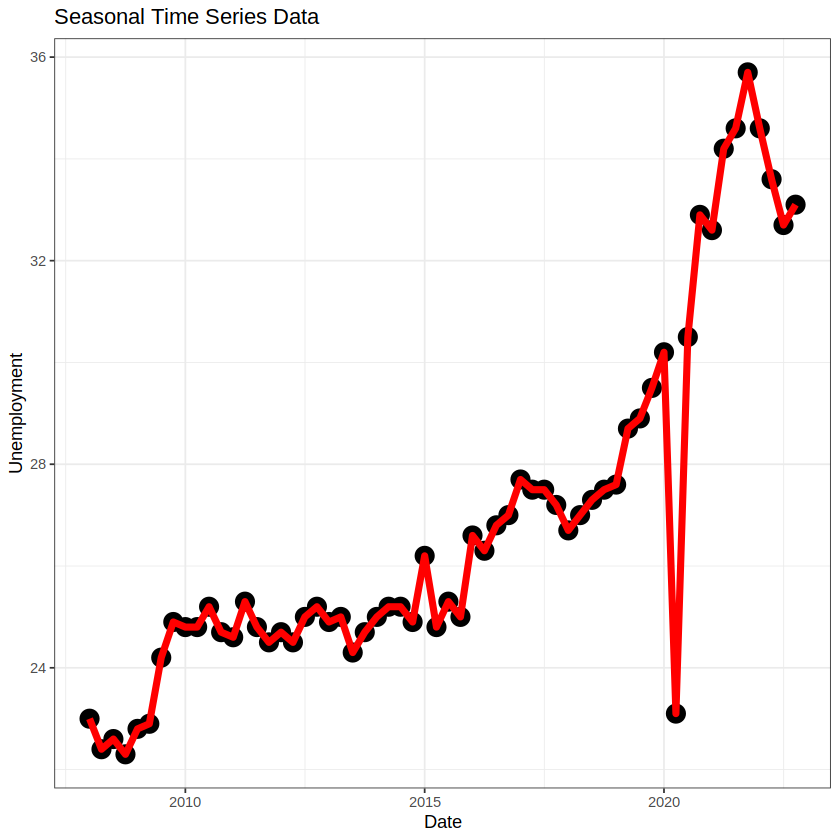

In [7]:

ggplot(df, aes(x = Dates, y = Rates)) +
geom_point(size=5) +  
geom_line(size=2, color="red") +
  labs(x = "Date", y = "Unemployment") +
  ggtitle("Seasonal Time Series Data") + theme_bw()

In [ ]:
#from the above plot we can see it is not stationary, so we start differencing

In [8]:
# <- data.frame(Time = data$Time[-1], Value = differenced_data)
dif1 <- diff(df$Rate)
dif_df1 <- data.frame(Date=df$Dates[-1], Rates=dif1)

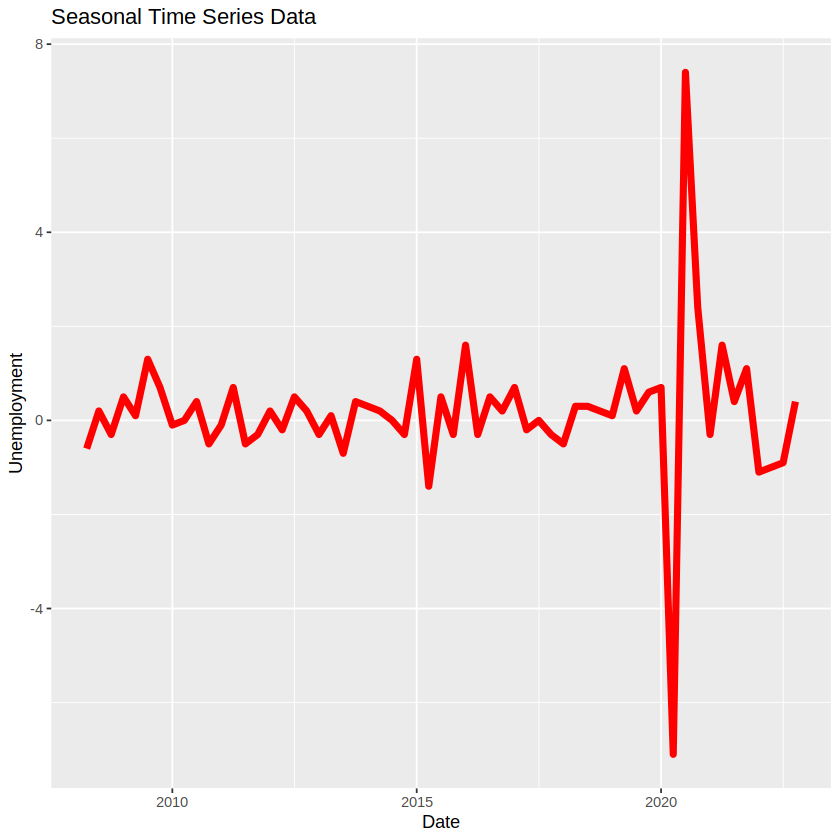

In [9]:
ggplot(dif_df1, aes(x = Date, y = Rates)) + 
geom_line(size=2, color="red") +
  labs(x = "Date", y = "Unemployment") +
  ggtitle("Seasonal Time Series Data")

In [10]:
#adf_test <- adf.test(data$Value)
#kpss_test <- kpss.test(data$Value)
adf_test <- adf.test(dif_df1$Rates)
kpss_test <- kpss.test(dif_df1$Rates)
adf_test
kpss_test

Warning message in adf.test(dif_df1$Rates):
“p-value smaller than printed p-value”
Warning message in kpss.test(dif_df1$Rates):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  dif_df1$Rates
Dickey-Fuller = -4.4808, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



	KPSS Test for Level Stationarity

data:  dif_df1$Rates
KPSS Level = 0.074912, Truncation lag parameter = 3, p-value = 0.1


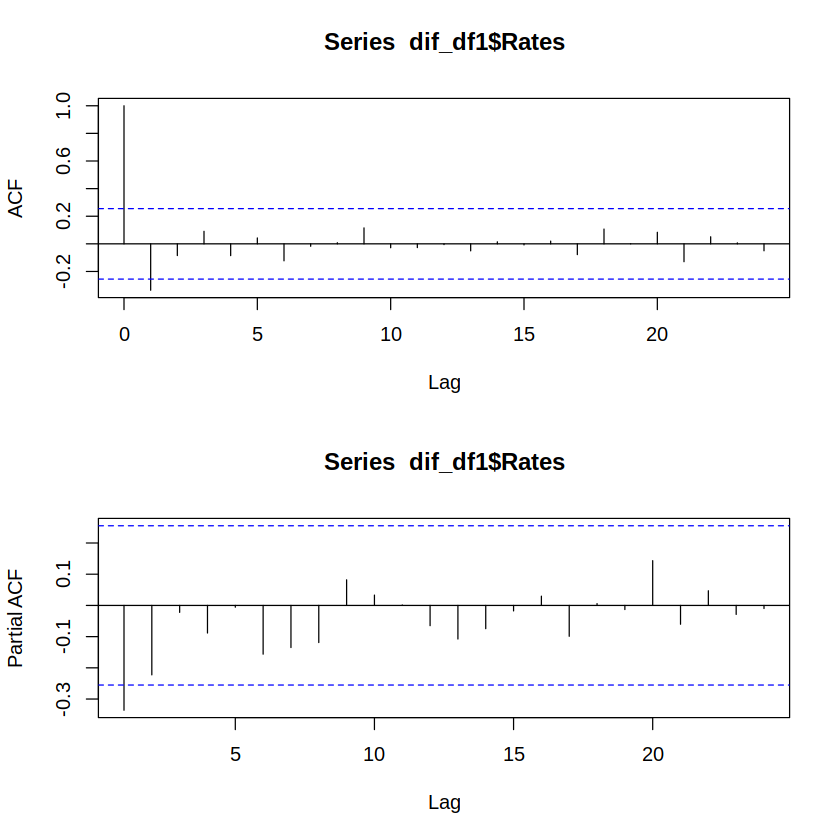

In [13]:
par(mfrow = c(2,1))
acf(dif_df1$Rates, lag.max=24)
pacf(dif_df1$Rates,lag.max = 24)

In [15]:
fit <- Arima(df$Rates, order=c(1,1,1), seasonal=list(order=c(1,1,1), period=12))

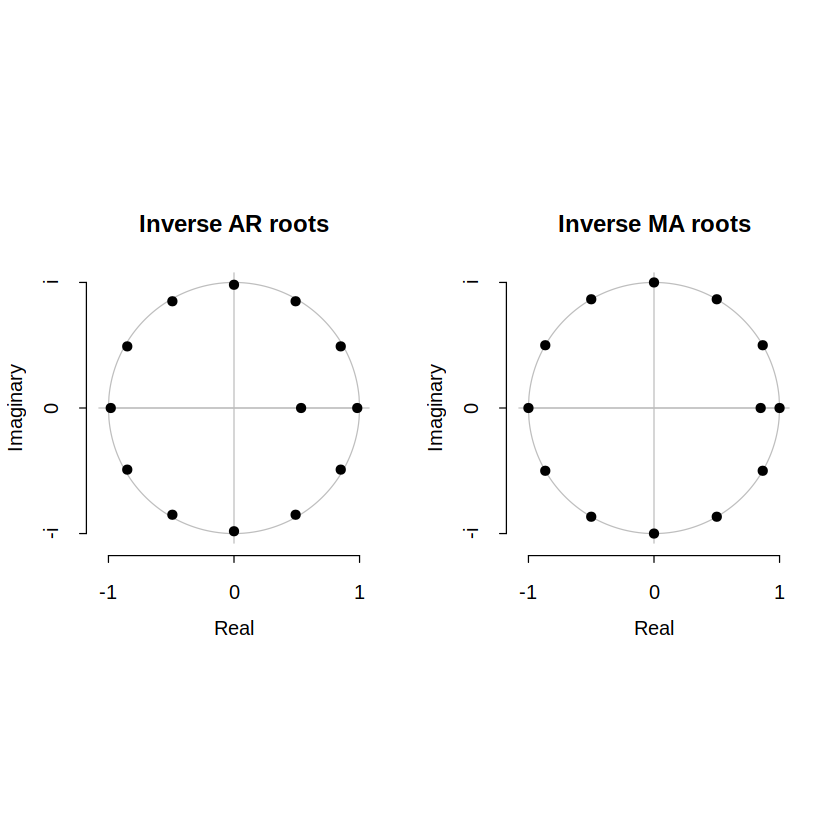

In [16]:
# model <- auto.arima(df$Rates)
plot(fit)

In [17]:
model <- auto.arima(df$Rates)

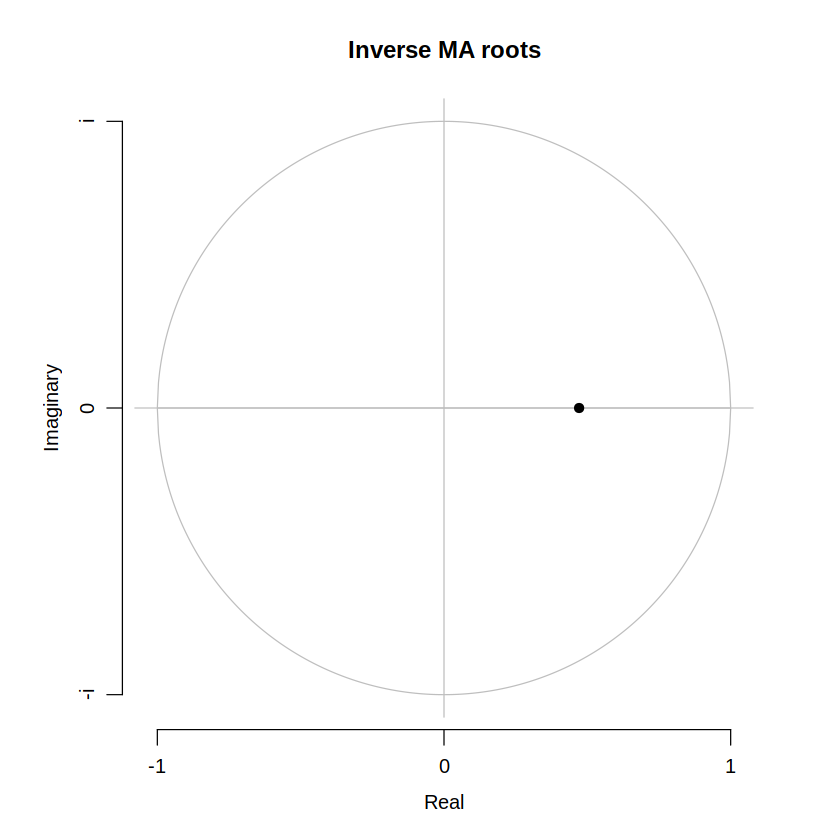

In [18]:
plot(model)

In [21]:
fit_pred <- forecast(fit, h=24)

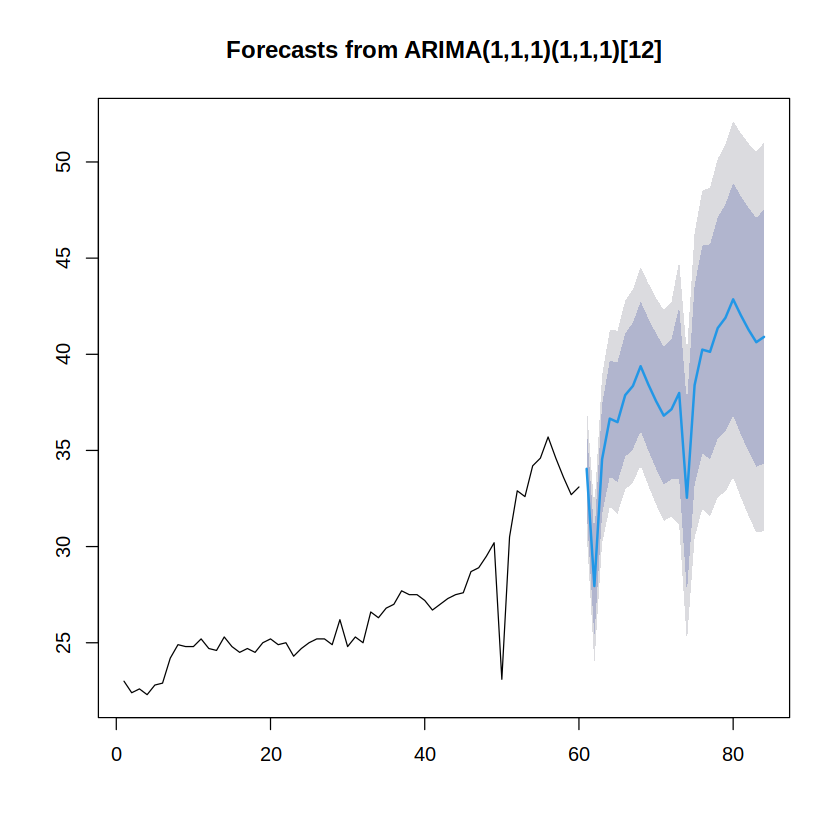

In [22]:
plot(fit_pred)

In [24]:
model_pred <- forecast(model, h=24)

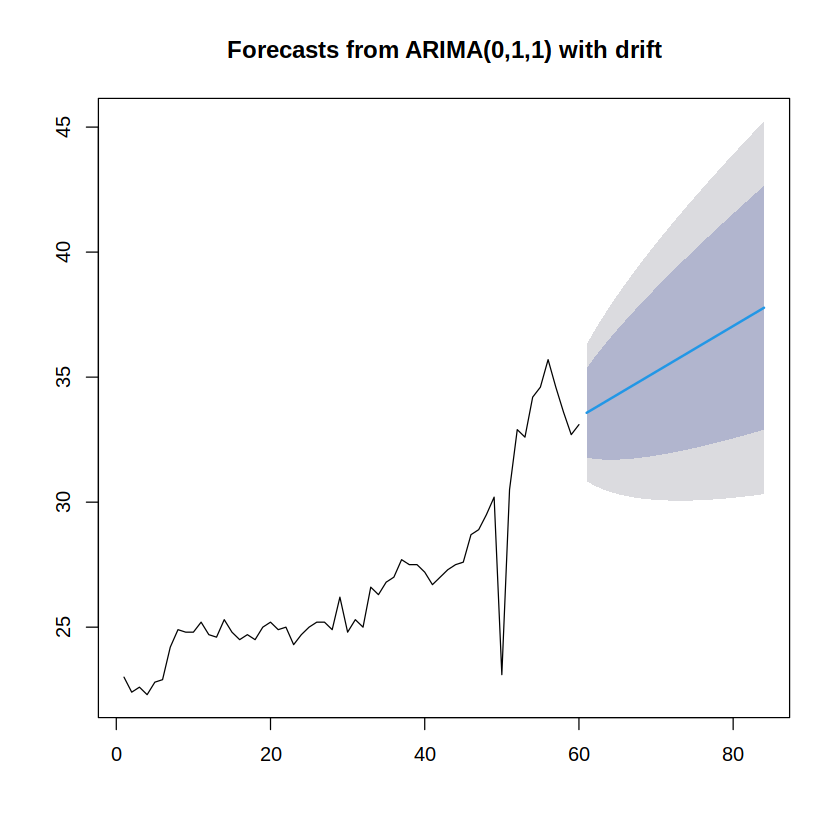

In [25]:
plot(model_pred)